In [1]:
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [6]:
#e1071 library gave error. so used kernlab library. both x and y are scaled inside ksvm.
library(kernlab) 
reg = ksvm(Salary~.,data = dataset, type = "eps-svr", kernel = "rbfdot" ) 

In [7]:
y_pred = predict(reg, data.frame(Level= 6.5))
y_pred

187541.1


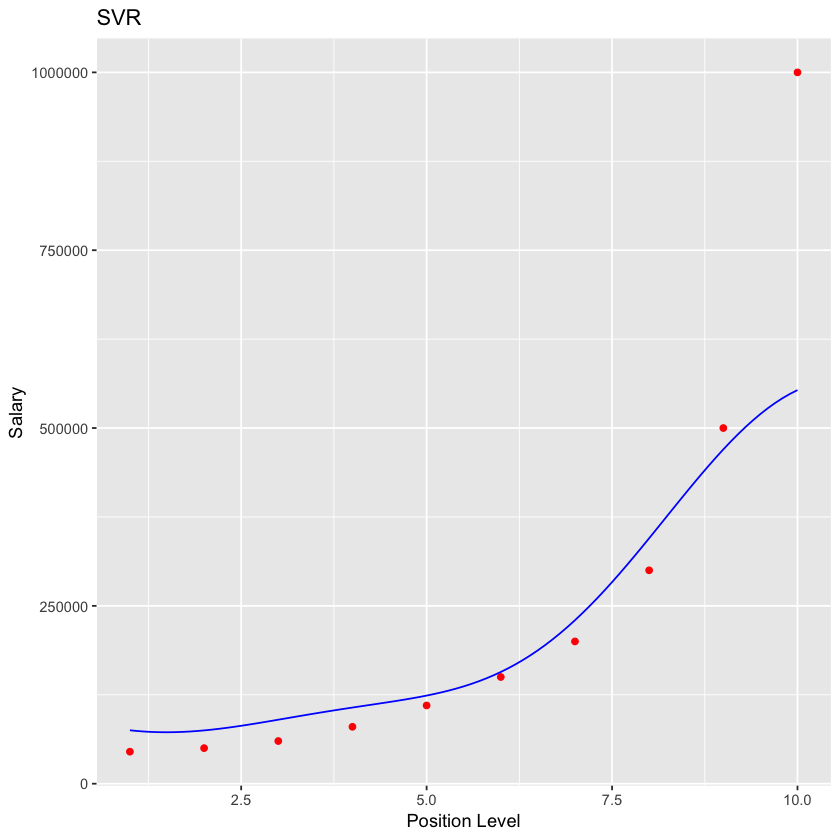

In [8]:
#visualising svr results with higher curve
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level),0.1)
ggplot()+
    geom_point(aes(x= dataset$Level, y=dataset$Salary), color= 'red')+
    geom_line(aes(x= x_grid, y= predict(reg, data.frame(Level = x_grid))), color= 'blue')+
    ggtitle('SVR')+
    xlab('Position Level')+
    ylab('Salary')

#### SVR has different regression goal compared to Linear Regression. In Linear Regression we are trying to minimize the 
#### error between prediction and data, in SVR our goal is to make sure that errors do not exceed the threshold.
#### The threshold is controlled by hyperparameter epsilon.